0.886903


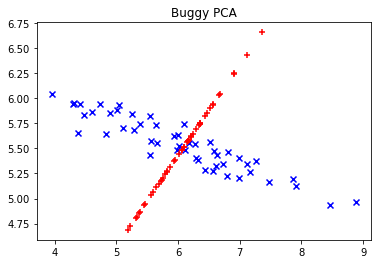

0.010006


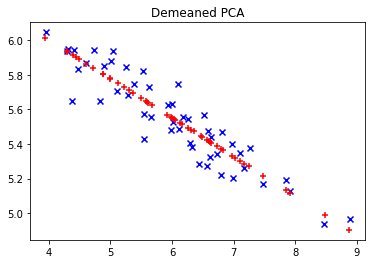

0.049472


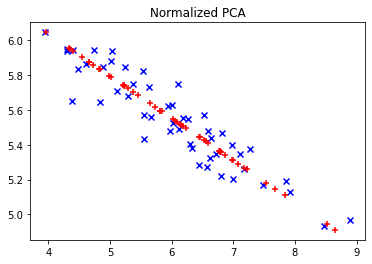

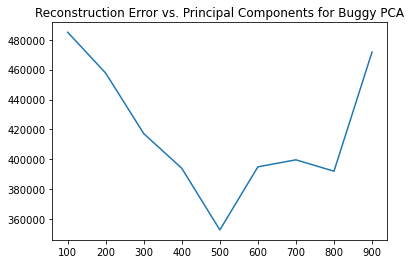

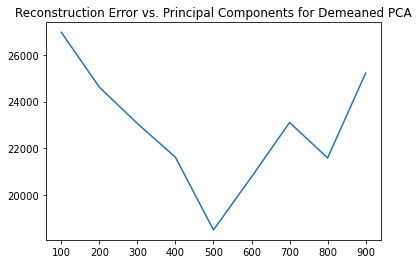

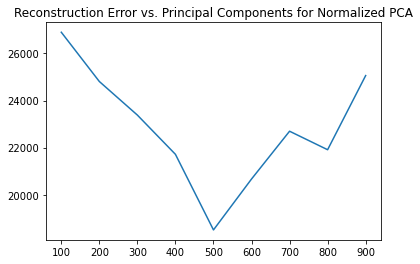

352741.458071
18509.059959
18503.165036


In [5]:
import numpy as np
import matplotlib.pyplot as plt

data2d = np.loadtxt("./data/data2D.csv", delimiter=',') # shape (50, 2)
data1000d = np.loadtxt("./data/data1000D.csv", delimiter=',') # shape (500, 1000)

def buggy_pca(X, k):
    d = X.shape[1]
    u, s, vt = np.linalg.svd(X)
    V = vt[range(k)].reshape((d, k)) # estimate parameters
    Z = np.matmul(X, V) # k-dim representation
    re_X = np.matmul(Z, V.T) # reconstructed X matrix
    return V, Z, re_X

def demean_X(X):
    X_d = X.copy()
    mu = np.mean(X_d, axis=0)
    return (X_d - mu), mu

def demeaned_pca(X, k):
    X_d, mu = demean_X(X)
    V, Z, re_X = buggy_pca(X_d, k)
    return V, Z, (re_X + mu)

def normalize_X(X):
    X_n = X.copy()
    mu = np.mean(X_n, axis=0)
    sd = np.std(X_n, axis=0)
    return ((X_n - mu) / sd), mu, sd

def normalized_pca(X, k):
    X_n, mu, sd = normalize_X(X)
    V, Z, re_X = buggy_pca(X_n, k)
    return V, Z, (re_X * sd) + mu

def plot_2d_pca(X, re_X):
    plt.scatter(X[:, 0], X[:, 1], c="blue", marker='x')
    plt.scatter(re_X[:, 0], re_X[:, 1], c="red", marker='+')

def get_reconstruction_error(X, re_X):
    return round((np.linalg.norm(X - re_X)**2) / len(X), 6)



if __name__ == '__main__':
    # experiment

    # 2D Data
    bv, bz, bx = buggy_pca(data2d, 1)
    print(get_reconstruction_error(data2d, bx))
    plot_2d_pca(data2d, bx)
    plt.title("Buggy PCA")
    plt.savefig("./buggy_pca.png")
    plt.show()

    dv, dz, dx = demeaned_pca(data2d, 1)
    print(get_reconstruction_error(data2d, dx))
    plot_2d_pca(data2d, dx)
    plt.title("Demeaned PCA")
    plt.savefig("./demeaned_pca.png")
    plt.show()

    nv, nz, nx = normalized_pca(data2d, 1)
    print(get_reconstruction_error(data2d, nx))
    plot_2d_pca(data2d, nx)
    plt.title("Normalized PCA")
    plt.savefig("./normalized_pca.png")
    plt.show()

    # 1000D Data
    k = [100, 200, 300, 400, 500, 600, 700, 800, 900]
    buggy_rc_error = []
    demeaned_rc_error = []
    normalized_rc_error = []
    for i in range(len(k)):
        bv, bz, bx = buggy_pca(data1000d, k[i])
        buggy_rc_error.append(get_reconstruction_error(data1000d, bx))
        dv, dz, dx = demeaned_pca(data1000d, k[i])
        demeaned_rc_error.append(get_reconstruction_error(data1000d, dx))
        nv, nz, nx = normalized_pca(data1000d, k[i])
        normalized_rc_error.append(get_reconstruction_error(data1000d, nx))
        
    plt.plot(k, buggy_rc_error)
    plt.title("Reconstruction Error vs. Principal Components for Buggy PCA")
    plt.savefig("./buggy_error_curve.png")
    plt.show()

    plt.plot(k, demeaned_rc_error)
    plt.title("Reconstruction Error vs. Principal Components for Demeaned PCA")
    plt.savefig("./demeaned_error_curve.png")
    plt.show()

    plt.plot(k, normalized_rc_error)
    plt.title("Reconstruction Error vs. Principal Components for Normalized PCA")
    plt.savefig("./normalized_error_curve.png")
    plt.show()

    bv, bz, bx = buggy_pca(data1000d, 500)
    print(get_reconstruction_error(data1000d, bx))

    dv, dz, dx = demeaned_pca(data1000d, 500)
    print(get_reconstruction_error(data1000d, dx))

    nv, nz, nx = normalized_pca(data1000d, 500)
    print(get_reconstruction_error(data1000d, nx))
    pass